# Лабораторная работа №4. 
## Логинов Сергей
### Вариант 25

1. Считаем данные Ozone Level Detection Data Set из uci. Возьмем 27, 53, 74 столбцы и изменим имя признака.

In [1]:
import pandas as pd
url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data"
data_set = pd.read_csv( url, header=None )
data_set = data_set[[26,52,73]]
data_set = data_set.rename(columns={26: "WSR_AV", 52:"T_AV", 73: "Class"})

In [2]:
data_set

,WSR_AV,T_AV,Class
0,3.1,12.5,0.0
1,3.4,17.8,0.0
2,3.5,18.7,0.0
3,3.2,18.7,0.0
4,2.3,21.1,0.0
...,...,...,...
2529,1.6,7.7,0.0
2530,2.6,12.9,0.0
2531,1.9,17.7,0.0
2532,2.1,19.9,0.0


2. Удалим значения с пропущенными метками класса и заменим пропущенные значения меток на среднее.

In [3]:
import numpy as np
data_set = data_set.replace("?", np.NaN)
for i in data_set:
    if data_set[i].dtype == "object":
        data_set[i] = pd.to_numeric(data_set[i])
data_set = data_set.fillna(data_set.mean())
data_set["Class"] = data_set["Class"].dropna()

In [26]:
data_set.Class.unique()

array([0., 1.])

3. Количество меток класса равно двум, поэтому никаких преобразований мы не делаем.

4. Визуализируем набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишем оси и рисунок, создадим легенду набора данных.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_data(X,y, xlabel, ylabel):
    colors = ["#00FFFF", "#F4A460", "#00FF00", "#DC143C", "#00FFFF", "#0000CD", "#708090", "Chocolate"]
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        fig_color = colors[int(cluster) % 8]
        plot_label = "Class {}".format(int(cluster))
        plt.scatter(X[row_ix, 0], X[row_ix, 1] ,s=75, color=fig_color, label=plot_label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

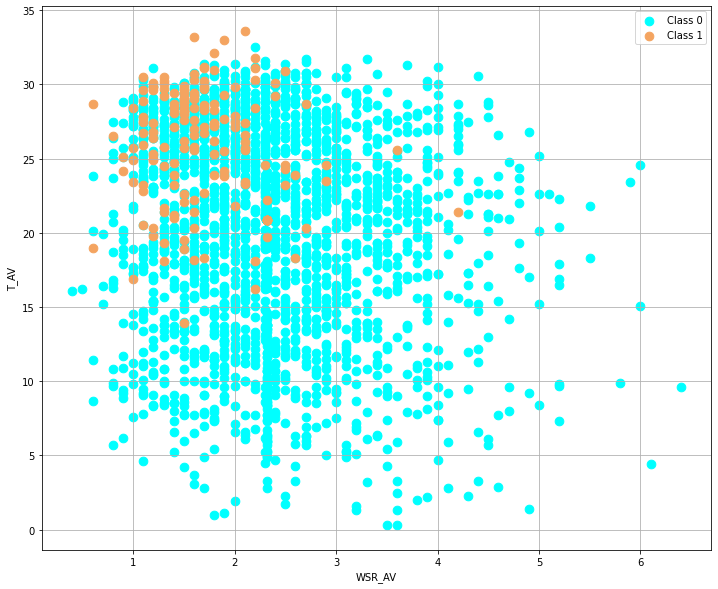

In [28]:
X = np.empty([2534, 2])
for i in range(len(data_set)):
    X[i][0] = data_set["WSR_AV"][i]
    X[i][1] = data_set["T_AV"][i]
y = data_set["Class"].tolist()
plot_data(X, y, "WSR_AV", "T_AV")

5. Проведем кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании. Это алгоритмы K-means, Affinity Propagation, Mean Shift, mini-batch K-Means.

In [29]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, MiniBatchKMeans
X = np.empty([2534, 2])
for i in range(len(data_set)):
    X[i][0] = data_set["WSR_AV"][i]
    X[i][1] = data_set["T_AV"][i]

1) **K-means**

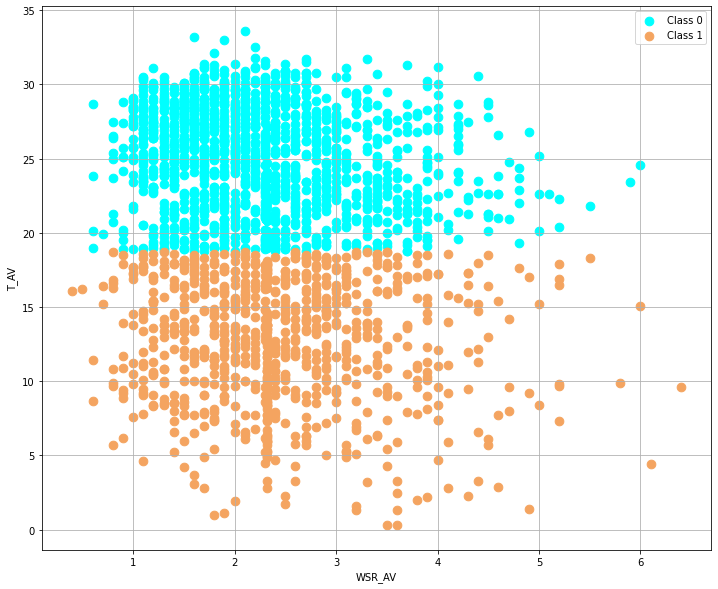

In [31]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)
kmeans_model_y = kmeans_model.predict(X)
plot_data(X, kmeans_model_y, "WSR_AV", "T_AV")

2) **Affinity Propagation**

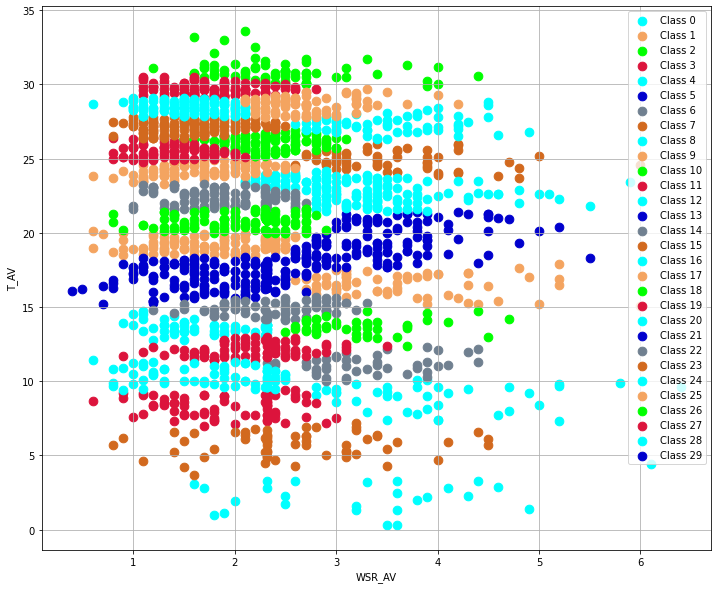

In [32]:
ap_model = AffinityPropagation(damping=0.9,random_state=0)
ap_model.fit(X)
ap_model_y = ap_model.predict(X)
plot_data(X, ap_model_y, "WSR_AV", "T_AV")

3) **Mean Shift**

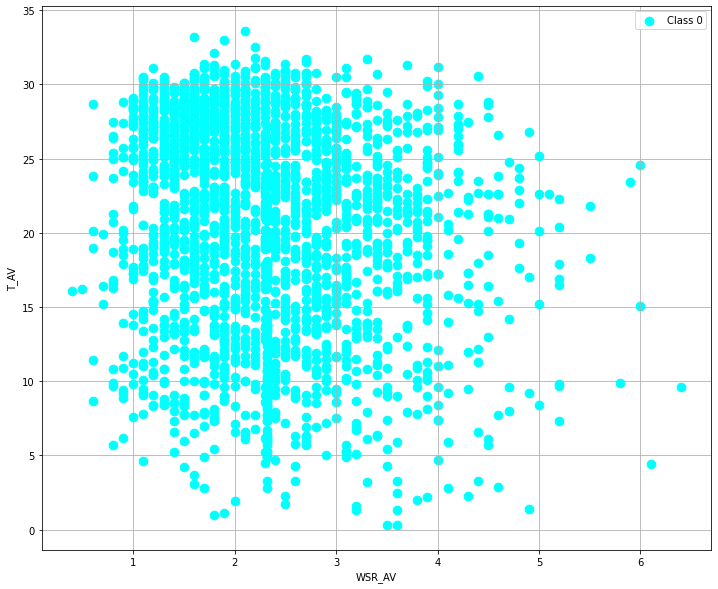

In [33]:
ms_model = MeanShift()
ms_model.fit(X)
ms_model_y = ms_model.predict(X)
plot_data(X, ms_model_y, "WSR_AV", "T_AV")

4) **mini-batch K-Means**

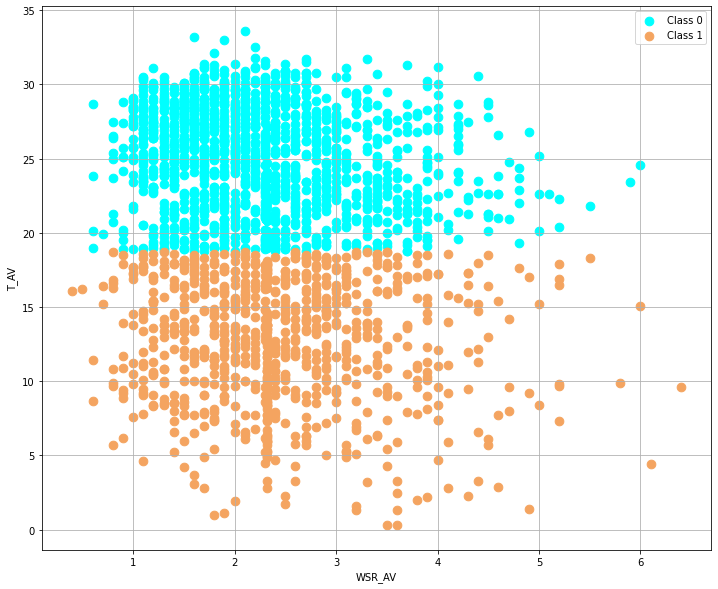

In [34]:
mnkmeans_model = MiniBatchKMeans(n_clusters=2)
mnkmeans_model.fit(X)
mnkmeans_model_y = mnkmeans_model.predict(X)
plot_data(X, mnkmeans_model_y, "WSR_AV", "T_AV")

6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, построим матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдем значения мер качества кластеризации, указанные в индивидуальном задании (чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса).

In [35]:
from sklearn.metrics.cluster import contingency_matrix
def num_classes(y):
    classes = {}
    classes_unique = np.unique(y)
    for i in classes_unique:
        classes[i] = 0
    for i in y:
        classes[i] += 1
    return classes

In [36]:
from math import sqrt

def purity(y, cont_matr):
    classes = num_classes(y)
    purity_cval = 0
    for i in range(len(cont_matr)):
        purity_cval += max(cont_matr[i]) / classes[i]
    purity_cval /= len(classes)
    return purity_cval

def TP(y, cont_matr):
    tmp = 0
    r = len(cont_matr)
    c = len(cont_matr[0])
    for i in range(c):
        for j in range(r):
            tmp += cont_matr[j][i]**2
    tmp -= len(y)
    tmp /= 2
    return tmp

def FN(y, cont_matr):
    tmp1 = 0
    for i in range(len(cont_matr)):
        tmp1 += sum(cont_matr[i])**2
    tmp2 = 0
    r = len(cont_matr)
    c = len(cont_matr[0])
    for i in range(c):
        for j in range(r):
            tmp2 += cont_matr[j][i]**2
    tmp1 -= tmp2
    tmp1 /= 2
    return tmp1

def FP(y, cont_matr):
    tmp1 = 0
    r = len(cont_matr)
    c = len(cont_matr[0])
    for i in range(c):
        tmp_c = 0
        for j in range(r):
            tmp_c += cont_matr[j][i]
        tmp1 += tmp_c ** 2
        
    tmp2 = 0
    r = len(cont_matr)
    c = len(cont_matr[0])
    for i in range(c):
        for j in range(r):
            tmp2 += cont_matr[j][i]**2
            
            
    tmp1 -= tmp2
    tmp1 /= 2
    return tmp1

def TN(y, cont_matr):
    N = (len(y) * (len(y) - 1)) / 2
    return (N - TP(y, cont_matr) - FN(y, cont_matr) - FP(y, cont_matr))

def Foulkes_Mallows_Index(y, cont_matr):
    tp = TP(y, cont_matr)
    tn = TN(y, cont_matr)
    fp = FP(y, cont_matr)
    value = sqrt((tp / (tp + tn)) * (tp /(tp + fp)))
    return value

In [37]:
def print_quality(func , func_name , y, models):
    cont_matr = contingency_matrix(y, models[0])
    p_val = func(y, cont_matr)
    print("Показатель {} для k-means = {}".format(func_name, p_val))

    cont_matr = contingency_matrix(y, models[1])
    p_val = func(y, cont_matr)
    print("Показатель {} для Affinity Propagation = {}".format(func_name, p_val))

    cont_matr = contingency_matrix(y, models[2])
    p_val = func(y, cont_matr)
    print("Показатель {} для Mean Shift = {}".format(func_name, p_val))

    cont_matr = contingency_matrix(y, models[3])
    p_val = func(y, cont_matr)
    print("Показатель {} для mini-batch K-Means = {}".format(func_name, p_val))

In [38]:
print_quality(purity, "purity", y, [kmeans_model_y, ap_model_y, ms_model_y, mnkmeans_model_y])

Показатель purity для k-means = 0.8016638584667228
Показатель purity для Affinity Propagation = 0.13039174389216512
Показатель purity для Mean Shift = 1.0
Показатель purity для mini-batch K-Means = 0.8016638584667228


In [39]:
print_quality(TP, "TP", y, [kmeans_model_y, ap_model_y, ms_model_y, mnkmeans_model_y])

Показатель TP для k-means = 1551782.0
Показатель TP для Affinity Propagation = 119106.0
Показатель TP для Mean Shift = 2829471.0
Показатель TP для mini-batch K-Means = 1551782.0


In [40]:
print_quality(FN, "FN", y, [kmeans_model_y, ap_model_y, ms_model_y, mnkmeans_model_y])

Показатель FN для k-means = 1277689.0
Показатель FN для Affinity Propagation = 2710365.0
Показатель FN для Mean Shift = 0.0
Показатель FN для mini-batch K-Means = 1277689.0


In [41]:
print_quality(FP, "FP", y, [kmeans_model_y, ap_model_y, ms_model_y, mnkmeans_model_y])

Показатель FP для k-means = 242336.0
Показатель FP для Affinity Propagation = 17475.0
Показатель FP для Mean Shift = 379840.0
Показатель FP для mini-batch K-Means = 242336.0


In [42]:
print_quality(TN, "TN", y, [kmeans_model_y, ap_model_y, ms_model_y, mnkmeans_model_y])

Показатель TN для k-means = 137504.0
Показатель TN для Affinity Propagation = 362365.0
Показатель TN для Mean Shift = 0.0
Показатель TN для mini-batch K-Means = 137504.0


In [43]:
print_quality(Foulkes_Mallows_Index, "Индекс Фоулкса – Мэллоуса", y, [kmeans_model_y, ap_model_y, ms_model_y, mnkmeans_model_y])

Показатель Индекс Фоулкса – Мэллоуса для k-means = 0.891360976324971
Показатель Индекс Фоулкса – Мэллоуса для Affinity Propagation = 0.4644654659676956
Показатель Индекс Фоулкса – Мэллоуса для Mean Shift = 0.9389591992596132
Показатель Индекс Фоулкса – Мэллоуса для mini-batch K-Means = 0.891360976324971


7. Определим алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании (purity). Это алгоритм Mean Shift.

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируем набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишем оси и рисунок, создадим легенду набора данных. 

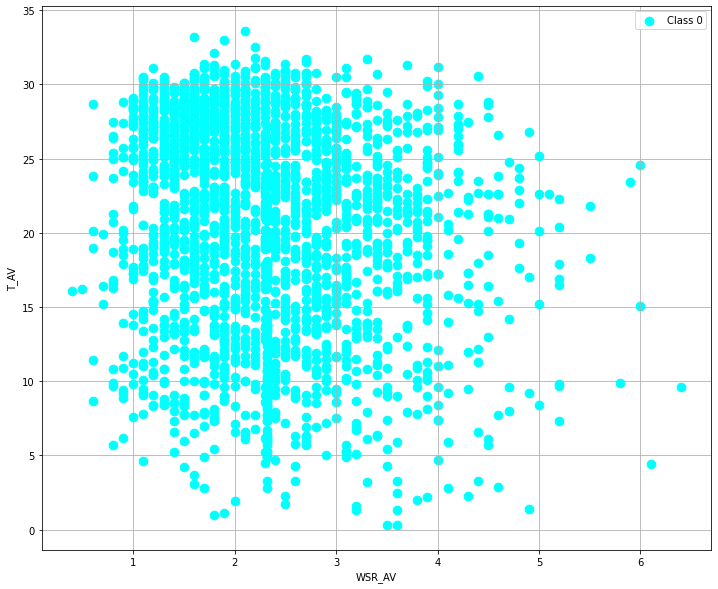

In [44]:
plot_data(X, ms_model_y, "WSR_AV", "T_AV")